### EDA
El EDA es una etapa fundamental en cualquier proyecto de **análisis de datos**. Te permite conocer mejor tus datos, identificar problemas y generar ideas para futuros análisis. Al realizar un EDA efectivo, puedes preparar tus datos para obtener resultados más precisos y reveladores.

### Importamos librerías

Comienza instalando solo las librerías que necesitas para empezar tu proyecto.

In [3]:
import pandas as pd
import pyarrow.parquet as pq
import pyarrow as pa
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from itertools import cycle
from sklearn.preprocessing import LabelEncoder
import ast

### La lectura de datos 

Lectura del archivo **australian_users_itemsETL.parquet**

In [4]:
#la siguiente línea de código lee el archivo australian_users_itemsETL.parquet y lo convierte en un DataFrame de Pandas
itemsdf = pq.read_table("../0-DATA/australian_users_itemsETL.parquet").to_pandas()
itemsdf.head(5)#presentación en un DataFrame los datos

,item_id,item_name,items_count,user_id,playtime_hours
0,10,Counter-Strike,277,76561197970982479,0.10
2,30,Day of Defeat,277,76561197970982479,0.12
8,300,Day of Defeat: Source,277,76561197970982479,78.88
9,240,Counter-Strike: Source,277,76561197970982479,30.88
10,3830,Psychonauts,277,76561197970982479,5.55


In [5]:
itemsdf.describe()# analizamos los calores estadísticos de las columnas numéricas

,item_id,items_count,playtime_hours
count,3.246362e+06,3.246362e+06,3.246362e+06
mean,1.771685e+05,2.480118e+02,2.590483e+01
std,1.266634e+05,5.683680e+02,1.119525e+02
min,1.000000e+01,1.000000e+00,2.000000e-02
25%,3.912000e+04,6.500000e+01,7.300000e-01
50%,2.149500e+05,1.220000e+02,3.420000e+00
75%,2.630200e+05,2.280000e+02,1.347000e+01
max,5.286600e+05,7.762000e+03,1.071288e+04


In [6]:
itemsdf.info()# analizamos de nuevo que nuestos datos no tiene valores nulos

<class 'pandas.core.frame.DataFrame'>
Index: 3246362 entries, 0 to 5153208
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   item_id         int64  
 1   item_name       object 
 2   items_count     int64  
 3   user_id         object 
 4   playtime_hours  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 148.6+ MB


### Análisis de datos de las columnas

Columna **item_id**

In [7]:
# solo nos da información del Id de cada nombre de los videojuegos

Columna **item_name**

In [12]:
itemname = itemsdf["item_name"].value_counts() #nombres de juegos más jugados
itemname

item_name
Counter-Strike: Global Offensive    42838
Garry's Mod                         41639
Left 4 Dead 2                       34535
Unturned                            34089
Terraria                            28244
                                    ...  
Castles                                 1
The Empty Inn                           1
Dr. Bulbaceous                          1
Cue Club 2                              1
Arachnophobia                           1
Name: count, Length: 10024, dtype: int64

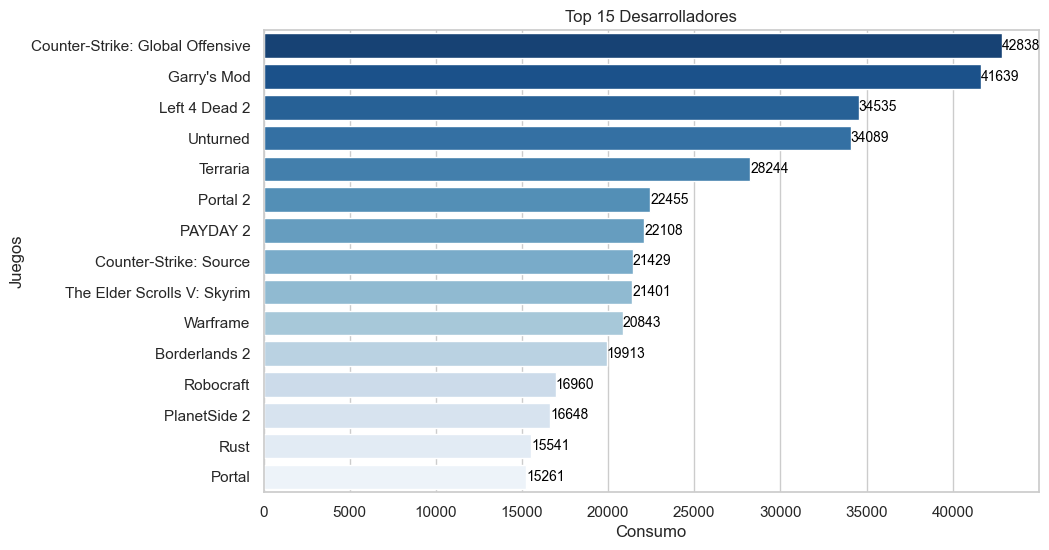

In [14]:
# Establece el estilo del gráfico como "whitegrid"
sns.set(style="whitegrid")

# Ajusta el tamaño del gráfico (ancho 10, alto 6)
plt.figure(figsize=(10, 6))

# Selecciona los 15 primeros elementos de la columna "itemname"
itemname_data = itemname[:15]

# Crea un gráfico de barras horizontales
# - Valores del eje x: valores de la columna "itemname_data"
# - Valores del eje y: índices de la columna "itemname_data"
# - Paleta de colores: "Blues_r"
sns.barplot(x=itemname_data.values, y=itemname_data.index, palette="Blues_r")

# Establece la etiqueta del eje x como "Consumo"
plt.xlabel('Consumo')

# Establece la etiqueta del eje y como "Juegos"
plt.ylabel('Juegos')

# Establece el título del gráfico como "Top 15 Desarrolladores"
plt.title('Top 15 Desarrolladores')

# Añade etiquetas con el valor de cada barra
for i, v in enumerate(itemname_data.values):
  # Posición x: valor de la barra + 0.1
  # Posición y: índice de la barra
  # Texto: valor de la barra
  # Color: negro
  # Alineación vertical: centro
  # Tamaño de fuente: 10
  plt.text(v + 0.1, i, str(v), color='black', va='center', fontsize=10)


Columna **items_count**

Eliminando

In [11]:
# eliminamos esta columna ya que indica la cantidad de juegos por usuario. con un filtro en usuario se puede optener este dato.
itemsdf = itemsdf.drop(columns=["items_count"])
itemsdf.head(3)

,item_id,item_name,user_id,playtime_hours
0,10,Counter-Strike,76561197970982479,0.10
2,30,Day of Defeat,76561197970982479,0.12
8,300,Day of Defeat: Source,76561197970982479,78.88


Columna **user_id**

In [15]:
# solo nos da información del Id de cada usuario

In [17]:
#podemos unir dos columnas y obtener: cantidad de horas jugadas por usucario
items_count = itemsdf.groupby('user_id')['playtime_hours'].unique().explode()  
items_count= pd.DataFrame(items_count) # convertimos a dataframe
items_count_user = items_count.sort_values('playtime_hours', ascending=False) # ordenamos de mayor a menor
items_count_user # visualizamos que existen 0.02 horas= 1.2 minutos, nadie juego ese tiempo

,playtime_hours
user_id,
wolop,10712.88
Evilutional,10588.25
76561198019826668,10540.87
76561198039832932,10223.52
tsunamitad,10001.13
...,...
76561198078062945,0.02
76561198101995099,0.02
76561198066935199,0.02


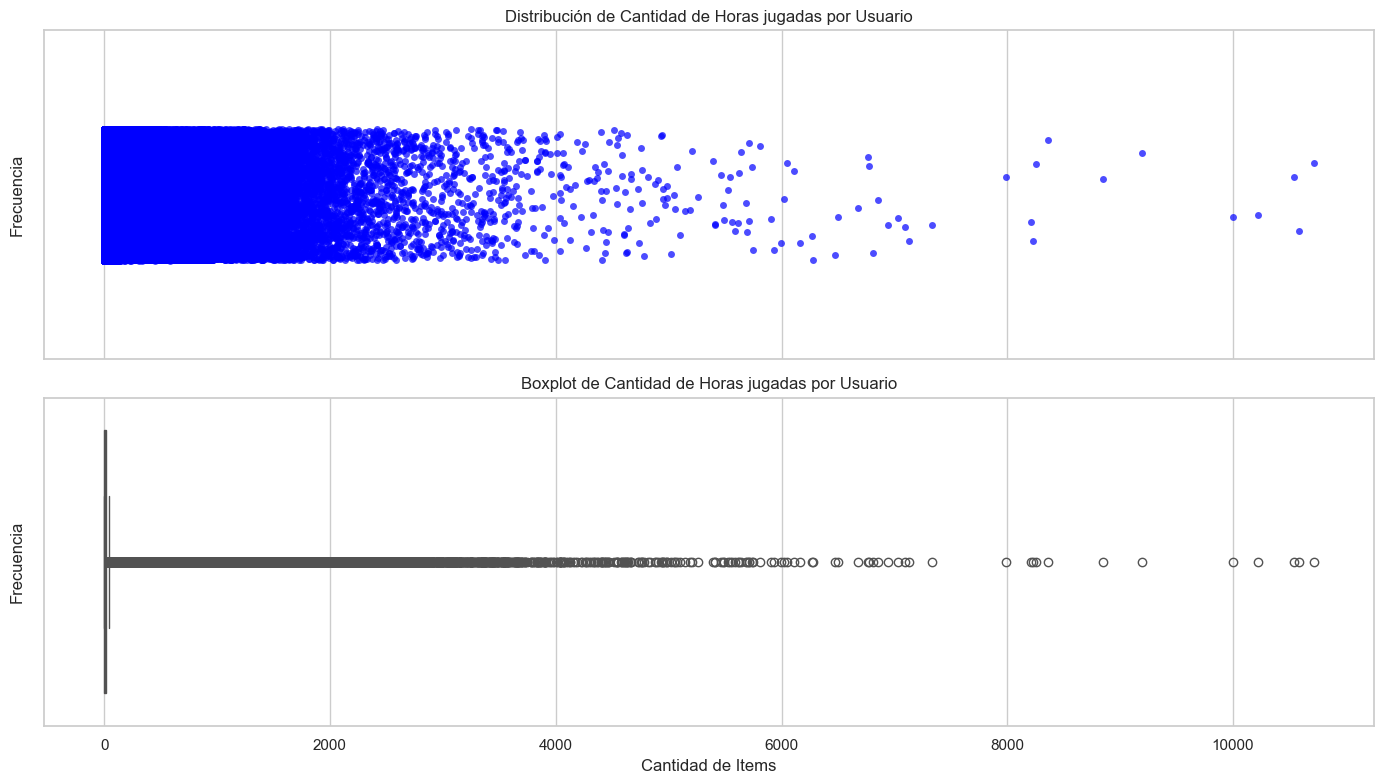

In [18]:
# Configura el estilo del gráfico como "whitegrid" y la paleta de colores como "plasma"
sns.set(style="whitegrid", palette="plasma")

# Crea una figura y dos subplots (filas: 2, columnas: 1)
# - Tamaño de la figura: 14 ancho y 8 alto
# - Compartir eje x entre subplots: True
fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Subplot 1 (eje superior): Diagrama de puntos
# - Datos: dataframe 'items_count_user'
# - Eje x: columna 'playtime_hours'
# - Eje del subplot: axes[0]
# - Color: azul
# - Jitter (separación aleatoria): 0.2
# - Transparencia: 0.7
sns.stripplot(data=items_count_user, x='playtime_hours', ax=axes[0], color="blue", jitter=0.2, alpha=0.7)

# Subplot 1 (eje superior): Etiquetas y título
axes[0].set_xlabel('Cantidad de Items')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Cantidad de Horas jugadas por Usuario')

# Subplot 2 (eje inferior): Diagrama de cajas
# - Datos: dataframe 'items_count_user'
# - Eje x: columna 'playtime_hours'
# - Eje del subplot: axes[1]
# - Paleta de colores: "plasma" heredada de sns.set()
sns.boxplot(data=items_count_user, x='playtime_hours', ax=axes[1], palette="plasma")

# Subplot 2 (eje inferior): Etiquetas y título
axes[1].set_xlabel('Cantidad de Items')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Boxplot de Cantidad de Horas jugadas por Usuario')

# Ajusta el espacio entre elementos del gráfico para una mejor visualización
plt.tight_layout()

# Muestra el gráfico generado
plt.show()


Columna **playtime_hours**

In [16]:
horas = itemsdf["playtime_hours"].value_counts() # obtenemos la cantidad de tiempos jugados y las veces que se jugó
horas

playtime_hours
0.02       101586
0.03        34391
0.05        31530
0.07        29127
0.08        27612
            ...  
1077.93         1
888.80          1
733.82          1
551.98          1
579.22          1
Name: count, Length: 48860, dtype: int64

In [17]:
#eliminamos tiempos de juego muy pequeños como segundos, valoraremos desde 6 min para adelante.
itemsdf = itemsdf[itemsdf["playtime_hours"] >= 0.1] #filtrop para eliminar tiempos menores a 0.1h=6min

Reseteando iíndices

In [18]:
#Reseteamos los indices
itemsdf.reset_index(inplace=True)
itemsdf.head(3)

,index,item_id,item_name,user_id,playtime_hours
0,0,10,Counter-Strike,76561197970982479,0.10
1,2,30,Day of Defeat,76561197970982479,0.12
2,8,300,Day of Defeat: Source,76561197970982479,78.88


In [19]:
#eliminamos la columna index
itemsdf = itemsdf.drop('index', axis=1)
itemsdf.head(5)

,item_id,item_name,user_id,playtime_hours
0,10,Counter-Strike,76561197970982479,0.10
1,30,Day of Defeat,76561197970982479,0.12
2,300,Day of Defeat: Source,76561197970982479,78.88
3,240,Counter-Strike: Source,76561197970982479,30.88
4,3830,Psychonauts,76561197970982479,5.55


Guardamos el EDA en archivos CSV y Parquet

In [20]:
tabla = pa.Table.from_pandas(itemsdf) # convertimos el dataframe en una tabla de pyarrow
pq.write_table(tabla,"../0-DATA/australian_users_itemsEDA.parquet") # guardamos la tabla en formato parquet

In [21]:
itemsdf.to_csv("../0-DATA/australian_users_itemsEDA.csv", index=False, encoding="utf-8") 